In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/ridhoaryo/Ujian_MachineLearning_JCDS_Bekasi01/master/nba_all_season.csv')
df

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
Unnamed: 0           11145 non-null int64
Unnamed: 0.1         11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               111

## No 1 Data Cleaning,Feature Selection, Standarization

In [4]:
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
best_player          0
dtype: int64

In [5]:
UniqueValue={}
for x in df:
    UniqueValue[x]=len(df[x].unique())

pd.Series(data=UniqueValue)

Unnamed: 0           11145
Unnamed: 0.1         11145
player_name           2235
team_abbreviation       36
age                     27
player_height           30
player_weight          157
college                316
country                 76
draft_year              45
draft_round              8
draft_number            75
gp                      85
pts                    308
reb                    154
ast                    114
net_rating             707
oreb_pct               216
dreb_pct               351
usg_pct                341
ts_pct                 529
ast_pct                479
season                  24
best_player              2
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.020099
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.140344
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [7]:
##Membuang kolom yang tidak di gunakan
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [8]:
## Cleaning Data yang bernilai Undrafted
## Saya memilih untuk mendrop Semua yang Undrafted
df=df.replace('Undrafted',np.nan)
df.dropna(inplace=True)

In [9]:
df['draft_year'] = df['draft_year'].astype(float)
df['draft_round'] = df['draft_round'].astype(float)
df['draft_number'] = df['draft_number'].astype(float)

## Standarization

In [10]:

kolom_standar=[]
scaler = StandardScaler()
## Memilih Kolom yang akan di standarisasi dengan acuan nilai yang berupa angka/int dengan max diatas 1
kolom_standar=['age','player_height','player_weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']

for x in kolom_standar:
    scaler.fit(df[[x]])
    df[x] = scaler.transform(df[[x]])

df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,Dennis Rodman,CHI,1.974485,-0.372753,-0.133999,Southeastern Oklahoma State,USA,1986.0,1.370666,0.328736,...,4.821911,0.635947,1.733314,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,0.186823,1.607678,1.320815,Florida,USA,1990.0,-0.592986,0.141904,...,-0.922049,-0.874415,1.364947,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,2.644859,0.476003,-0.497703,Detroit Mercy,USA,1979.0,3.334319,2.259337,...,-1.118760,-0.820473,-0.030968,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,-0.707008,0.193085,-0.061259,UCLA,USA,1995.0,-0.592986,-0.792258,...,-0.607311,-0.712590,-0.670763,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,1.527570,0.476003,0.593408,Villanova,USA,1985.0,-0.592986,-0.729980,...,-0.567969,-0.928356,-0.913109,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,Mason Plumlee,DEN,0.633739,1.041841,1.102593,Duke,USA,2013.0,-0.592986,0.017349,...,0.612297,0.258357,0.298623,0.094,0.196,0.177,0.619,0.201,2019-20,0
11135,Matisse Thybulle,PHI,-0.930466,-0.655672,-0.825036,Washington,USA,2019.0,-0.592986,-0.107206,...,-0.922049,-0.388941,0.288929,0.031,0.047,0.111,0.522,0.085,2019-20,0
11138,Maurice Harkless,NYK,-0.260093,-0.089834,-0.133999,"St. John's, N.Y.",USA,2012.0,-0.592986,-0.418593,...,0.022164,-0.496824,0.356786,0.038,0.119,0.104,0.575,0.059,2019-20,0
11141,Melvin Frazier Jr.,ORL,-0.930466,-0.655672,-0.315851,Tulane,USA,2018.0,1.370666,0.826956,...,-1.394155,-0.982298,-0.060050,0.018,0.058,0.164,0.480,0.033,2019-20,0


## No 2 Visualisasi Data

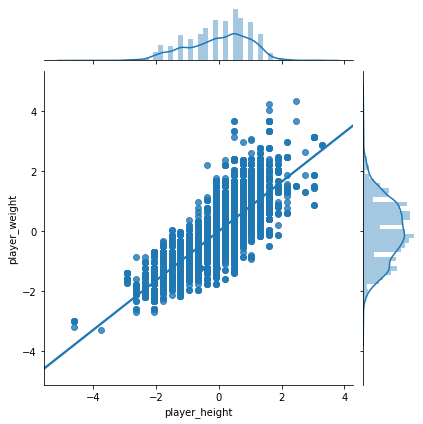

In [12]:
sns.jointplot(x='player_height', y='player_weight', data=df,kind='reg')

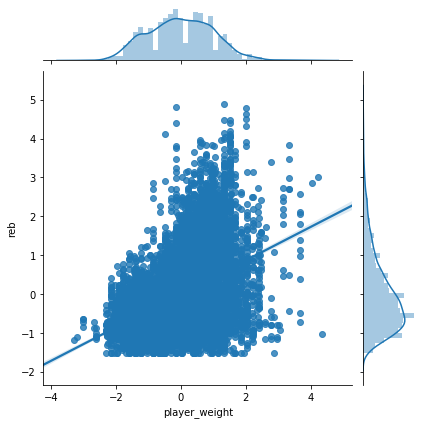

In [13]:
sns.jointplot(x='player_weight', y='reb', data=df,kind='reg')

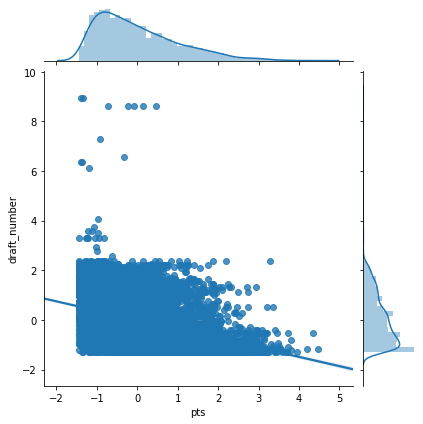

In [14]:
sns.jointplot(x='pts', y='draft_number', data=df,kind='reg')

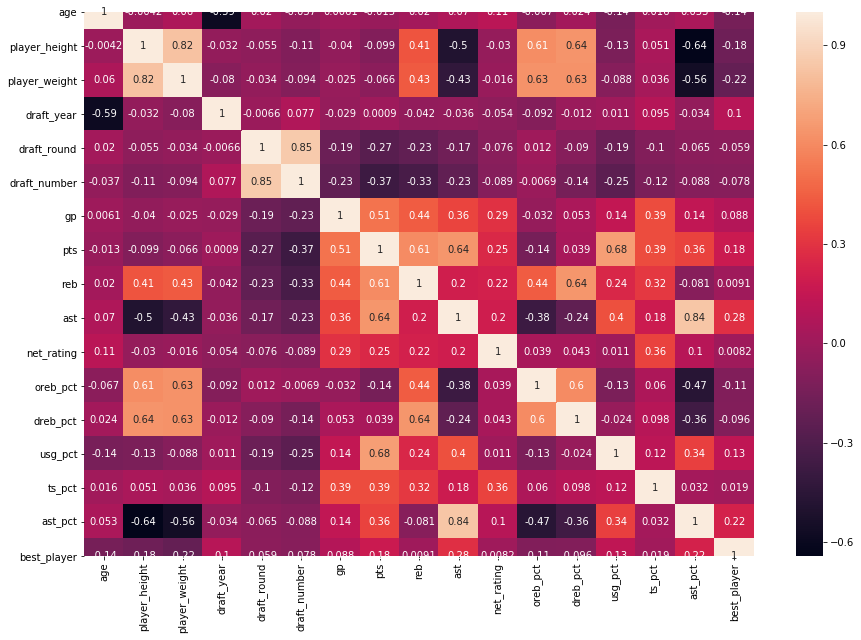

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

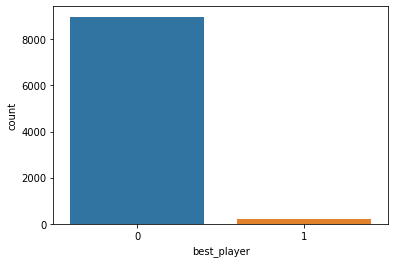

In [16]:
sns.countplot(x='best_player', data=df)

In [17]:
df['best_player'].value_counts()

0    8968
1     218
Name: best_player, dtype: int64

### Insight
- Ada Keterkaitan Antara Tinggi dan Berat Badan Pemain, Semakin Tinggi Maka Semakin Berat
- Ada Keterkatian Antara TInggi dengan Rata2 Rebound yang dilakukan dimana Semakin Tinggi Pemain Semakin Sering dia melakukan Rebound
- Ada Sedikit Keterkatian Antara Poin yang di cetak dengan ronde dimainkan namun tidak memiliki korelasi yang signifikan
- Korelasi fitur dengan label best player memiliki nilai2 yang cukup kecil, namun bukan berarti model akan berakurasi buruk
- Ketidak seimbangan data antara Label BEst Player dengan NOn Best Player dimana perbandingan bestplayer hanya 2.4% dari non best player

## NO 3 Train Test Split


In [18]:
X = df[['age','player_height','player_weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']]
y = df['best_player']

In [19]:
X

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,draft_number,draft_round
0,1.974485,-0.372753,-0.133999,-0.001170,-0.517928,4.821911,0.635947,1.733314,0.328736,1.370666
1,0.186823,1.607678,1.320815,-1.693408,-1.075303,-0.922049,-0.874415,1.364947,0.141904,-0.592986
2,2.644859,0.476003,-0.497703,-1.947244,-1.321203,-1.118760,-0.820473,-0.030968,2.259337,3.334319
3,-0.707008,0.193085,-0.061259,0.379584,-0.845795,-0.607311,-0.712590,-0.670763,-0.792258,-0.592986
4,1.527570,0.476003,0.593408,-1.185737,-1.058909,-0.567969,-0.928356,-0.913109,-0.729980,-0.592986
...,...,...,...,...,...,...,...,...,...,...
11134,0.633739,1.041841,1.102593,-0.170394,-0.239240,0.612297,0.258357,0.298623,0.017349,-0.592986
11135,-0.930466,-0.655672,-0.825036,0.041136,-0.698255,-0.922049,-0.388941,0.288929,-0.107206,-0.592986
11138,-0.260093,-0.089834,-0.133999,0.168054,-0.517928,0.022164,-0.496824,0.356786,-0.418593,-0.592986
11141,-0.930466,-0.655672,-0.315851,-1.693408,-1.255630,-1.394155,-0.982298,-0.060050,0.826956,1.370666


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11134    0
11135    0
11138    0
11141    0
11142    0
Name: best_player, Length: 9186, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)
print('Xtrain:',X_train.shape)
print('ytrain:',y_train.shape)
print('Xtest:',X_test.shape)
print('ytest:',y_test.shape)

Xtrain: (7165, 10)
ytrain: (7165,)
Xtest: (2021, 10)
ytest: (2021,)


## No 4 dan 5 Membuat Model dan Evaluation Matrix Untuk Setiap Model

#### 1. Model Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("b/m/slope", logreg.coef_[0])
print("a/c/intercept", logreg.intercept_[0])

b/m/slope [-2.10923393e+00  4.92628107e-01 -2.89259492e+00  2.13187953e-01
  6.91237038e-01  5.97570078e-01  6.43863708e-01 -2.58008445e-01
  2.22638433e-03 -1.11600246e-01]
a/c/intercept -7.893631629731036


C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
logreg_pred= logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)
pd.Series(logreg_pred)

0       0
1       0
2       0
3       0
4       0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 2021, dtype: int64

In [25]:
pd.Series(logreg_pred).value_counts()

0    1992
1      29
dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix
cmat_logreg = confusion_matrix(y_test, logreg_pred)
cmat_logreg

array([[1968,    9],
       [  24,   20]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc

In [28]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.69      0.45      0.55        44

    accuracy                           0.98      2021
   macro avg       0.84      0.72      0.77      2021
weighted avg       0.98      0.98      0.98      2021



#### 2. Model Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
## Hyper Param terbaik yang digunakan Adalah criterion Entropy dengan max Feature 10(Code BEst Param Ada di Paling Bawah)
dt_entro = DecisionTreeClassifier(criterion='entropy',max_features=10)
dt_entro.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
dtentro_pred= dt_entro.predict(X_test)
dtentro_proba = dt_entro.predict_proba(X_test)
pd.Series(dtentro_pred)

0       0
1       0
2       0
3       0
4       0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 2021, dtype: int64

In [31]:
pd.Series(dtentro_pred).value_counts()

0    1976
1      45
dtype: int64

In [32]:
cmat_dtentro = confusion_matrix(y_test, dtentro_pred)
cmat_dtentro

array([[1976,    1],
       [   0,   44]], dtype=int64)

In [33]:
print(classification_report(y_test,dtentro_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      1.00      0.99        44

    accuracy                           1.00      2021
   macro avg       0.99      1.00      0.99      2021
weighted avg       1.00      1.00      1.00      2021



#### 3. Model Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
## Setelah melakukan beberapa hyperparameter tuning dengan mengubah criterion dan random_state dengan range 10-42
## diPeroleh Hyper Param terbaik yang digunakan Adalah criterion Entropy dengan random_state 20 (Hasil Best Param Ada di Bawah)

rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='auto', oob_score=True, random_state=20)
rfc.fit(X_train, y_train)


C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=20, verbose=0,
                       warm_start=False)

In [36]:
print('Jumlah Estimator',len(rfc.estimators_))
print('Jumlah Feature',rfc.n_features_)
print('OOB Score',rfc.oob_score_)

Jumlah Estimator 10
Jumlah Feature 10
OOB Score 0.9979064898813678


In [37]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)
pd.Series(rfc_pred)

0       0
1       0
2       0
3       0
4       0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 2021, dtype: int64

In [38]:
pd.Series(rfc_pred).value_counts()

0    1978
1      43
dtype: int64

In [39]:
cmat_rfc = confusion_matrix(y_test, rfc_pred)
cmat_rfc

array([[1976,    1],
       [   2,   42]], dtype=int64)

In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      0.95      0.97        44

    accuracy                           1.00      2021
   macro avg       0.99      0.98      0.98      2021
weighted avg       1.00      1.00      1.00      2021



### ROC dan AUC

In [41]:
# Menghitung ROC AUC dari Logistic Regression
problogreg = logreg_proba[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Menghitung ROC AUC dari Decision Tree
probdtentro = dtentro_proba[:,1]
fpr_dtentro, tpr_dtentro, threshold_dtentro = roc_curve(y_test, probdtentro)
roc_auc_dtentro = auc(fpr_dtentro, tpr_dtentro)

# Menghitung ROC AUC dari Random Forest
probrfc = rfc_proba[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

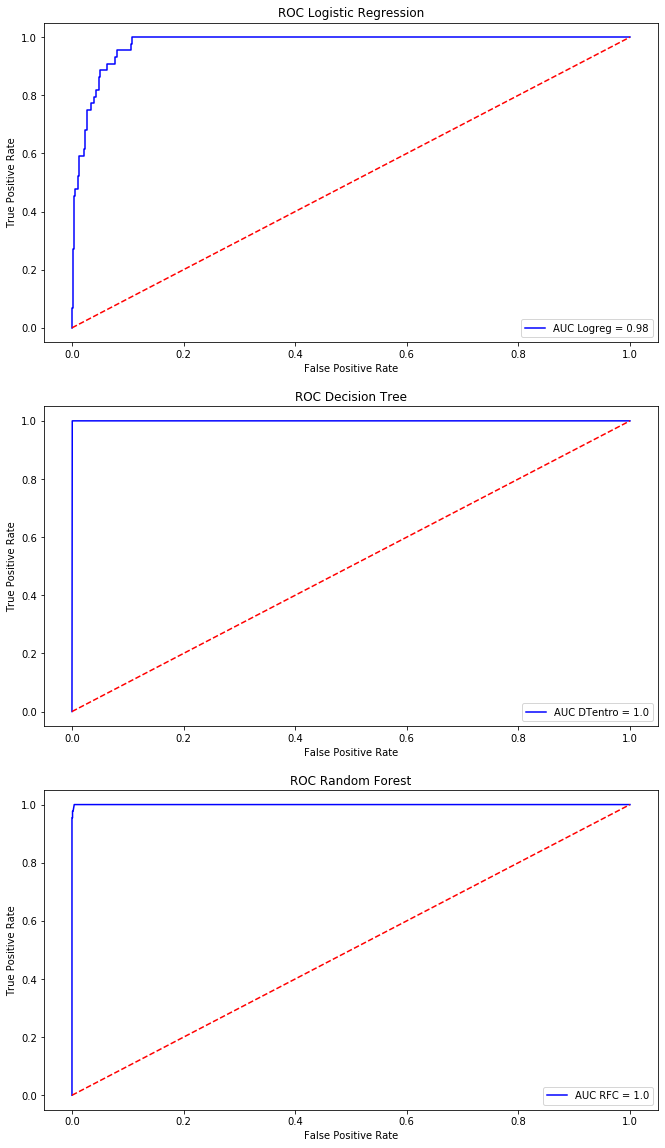

In [42]:
fig,ax = plt.subplots(nrows=3,figsize=(11,20),sharey=True)
ax[0].plot(fpr_logreg, tpr_logreg,'b',label='AUC Logreg = {}'.format(round(roc_auc_logreg,2)))
ax[0].set_title('ROC Logistic Regression')
ax[0].plot([0,1], [0,1], 'r--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

ax[1].plot(fpr_dtentro, tpr_dtentro,'b',label='AUC DTentro = {}'.format(round(roc_auc_dtentro,2)))
ax[1].set_title('ROC Decision Tree')
ax[1].plot([0,1], [0,1], 'r--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

ax[2].plot(fpr_rfc, tpr_rfc,'b',label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
ax[2].set_title('ROC Random Forest')
ax[2].plot([0,1], [0,1], 'r--')
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].legend(loc='lower right')


yang menjadi titik krusialnya adalah probabilitas false negatif karena dari data negatif merupakan data yang dominan di banding false positifnya

## NO 6 Teknik OverSampling Dengan SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=20, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [44]:
pd.Series(ysmot_train).value_counts()

1    6991
0    6991
dtype: int64

In [45]:
y_train.value_counts()

0    6991
1     174
Name: best_player, dtype: int64

In [46]:
## Model LogReg dengan data smote
logregsm = LogisticRegression()
logregsm.fit(Xsmot_train, ysmot_train)
print("b/m/slope", logreg.coef_[0])
print("a/c/intercept", logreg.intercept_[0])

b/m/slope [-2.10923393e+00  4.92628107e-01 -2.89259492e+00  2.13187953e-01
  6.91237038e-01  5.97570078e-01  6.43863708e-01 -2.58008445e-01
  2.22638433e-03 -1.11600246e-01]
a/c/intercept -7.893631629731036


C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
## Model Decision Tree dengan data smote
dtentro_sm = DecisionTreeClassifier(criterion='entropy',max_features=10)
dtentro_sm.fit(Xsmot_train, ysmot_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
## Model RandomForest dengan data smote
rfcsm = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='auto', oob_score=True, random_state=20)
rfcsm.fit(Xsmot_train, ysmot_train)

C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Brain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=20, verbose=0,
                       warm_start=False)

In [49]:
logregsm_pred = logregsm.predict(X_test)
logregsm_prob = logregsm.predict_proba(X_test)

dtentro_sm_pred = dtentro_sm.predict(X_test)
dtentro_sm_prob = dtentro_sm.predict_proba(X_test)

rfcsmot_pred = rfcsm.predict(X_test)
rfcsmot_prob = rfcsm.predict_proba(X_test)

In [50]:
print(classification_report(y_test,logreg_pred))
print(classification_report(y_test,logregsm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.69      0.45      0.55        44

    accuracy                           0.98      2021
   macro avg       0.84      0.72      0.77      2021
weighted avg       0.98      0.98      0.98      2021

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1977
           1       0.25      0.91      0.39        44

    accuracy                           0.94      2021
   macro avg       0.62      0.92      0.68      2021
weighted avg       0.98      0.94      0.95      2021



In [51]:
print(classification_report(y_test,dtentro_pred))
print(classification_report(y_test,dtentro_sm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      1.00      0.99        44

    accuracy                           1.00      2021
   macro avg       0.99      1.00      0.99      2021
weighted avg       1.00      1.00      1.00      2021

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      1.00      0.99        44

    accuracy                           1.00      2021
   macro avg       0.99      1.00      0.99      2021
weighted avg       1.00      1.00      1.00      2021



In [52]:
print(classification_report(y_test,rfc_pred))
print(classification_report(y_test,rfcsmot_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      0.95      0.97        44

    accuracy                           1.00      2021
   macro avg       0.99      0.98      0.98      2021
weighted avg       1.00      1.00      1.00      2021

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      0.95      0.97        44

    accuracy                           1.00      2021
   macro avg       0.99      0.98      0.98      2021
weighted avg       1.00      1.00      1.00      2021



In [53]:
# Menghitung ROC AUC dari Logistic Regression SMOTE
problogregsm = logregsm_prob[:,1]
fpr_logregsm, tpr_logregsm, threshold_logregsm = roc_curve(y_test, problogregsm)
roc_auc_logregsm = auc(fpr_logregsm, tpr_logregsm)

# Menghitung ROC AUC dari Decision Tree SMOTE
probdtentro_sm = dtentro_sm_prob[:,1]
fpr_dtentro_sm, tpr_dtentro_sm, threshold_dtentro_sm = roc_curve(y_test, probdtentro_sm)
roc_auc_dtentro_sm = auc(fpr_dtentro_sm, tpr_dtentro_sm)

# Menghitung ROC AUC dari Random Forest SMOTE
probrfcsmot = rfcsmot_prob[:,1]
fpr_rfcsmot, tpr_rfcsmot, threshold_rfcsmot = roc_curve(y_test, probrfcsmot)
roc_auc_rfcsmot = auc(fpr_rfcsmot, tpr_rfcsmot)

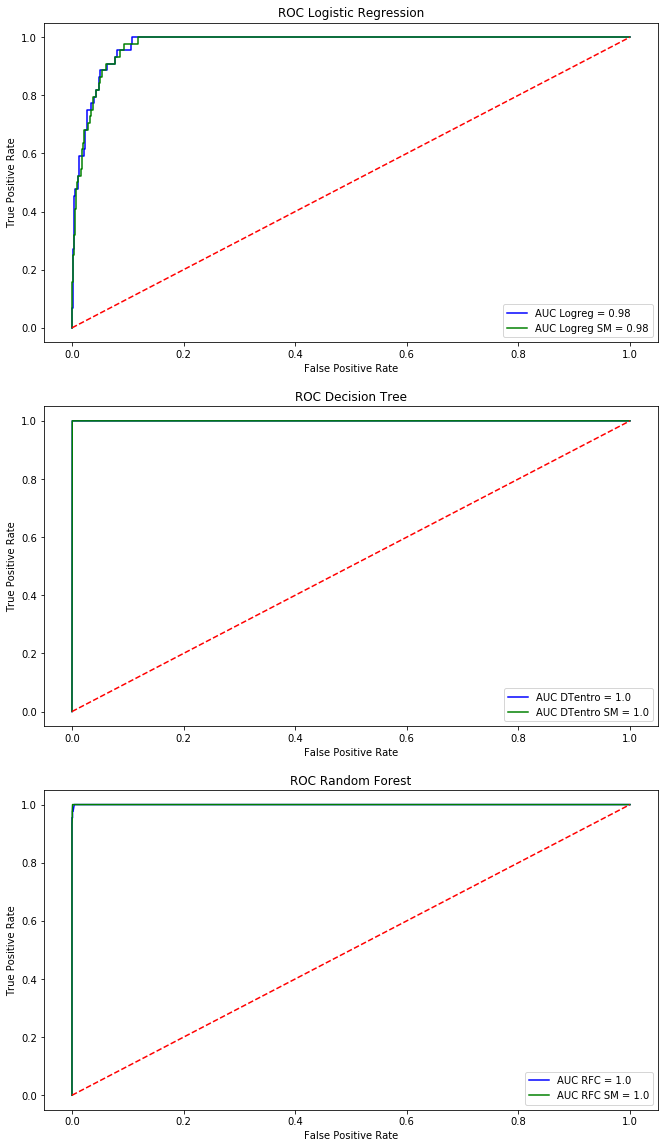

In [65]:
fig,ax = plt.subplots(nrows=3,figsize=(11,20),sharey=True)
ax[0].plot(fpr_logreg, tpr_logreg,'b',label='AUC Logreg = {}'.format(round(roc_auc_logreg,2)))
ax[0].plot(fpr_logregsm, tpr_logregsm,'g',label='AUC Logreg SM = {}'.format(round(roc_auc_logregsm,2)))
ax[0].set_title('ROC Logistic Regression')
ax[0].plot([0,1], [0,1], 'r--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

ax[1].plot(fpr_dtentro, tpr_dtentro,'b',label='AUC DTentro = {}'.format(round(roc_auc_dtentro,2)))
ax[1].plot(fpr_dtentro_sm, tpr_dtentro_sm,'g',label='AUC DTentro SM = {}'.format(round(roc_auc_dtentro_sm,2)))
ax[1].set_title('ROC Decision Tree')
ax[1].plot([0,1], [0,1], 'r--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

ax[2].plot(fpr_rfc, tpr_rfc,'b',label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
ax[2].plot(fpr_rfcsmot, tpr_rfcsmot,'g',label='AUC RFC SM = {}'.format(round(roc_auc_rfcsmot,2)))
ax[2].set_title('ROC Random Forest')
ax[2].plot([0,1], [0,1], 'r--')
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].legend(loc='lower right')


## Hasil Best Param Untuk Decision Tree

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
random_grid = {
    # Number of features
    'max_features': ['auto', 'sqrt'],
    # kedalaman pohon
    'max_depth': [int(x) for x in np.linspace(start=10,stop=110,num=11)],
    # minimum sample untuk di-split
    'min_samples_split': [int(x) for x in np.linspace(start=100, stop=1000, num=100)],
    
}
dt_random = RandomizedSearchCV(estimator=dt_entro ,
                              param_distributions= random_grid,
                              n_iter=10, cv=3, n_jobs=-1, scoring='accuracy')


In [66]:
dt_random.fit(Xsmot_train, ysmot_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=10,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [77]:
random_grid = {
    # n_estimators = jumlah decision trees
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
     # Random State
    'random_state': [int(x) for x in np.linspace(start=10, stop=42, num=10)],
    # Number of features
    'max_features': ['auto', 'sqrt'],
    # kedalaman pohon
    'max_depth': [int(x) for x in np.linspace(start=10,stop=110,num=11)],
    # minimum sample untuk di-split
    'min_samples_split': [int(x) for x in np.linspace(start=100, stop=1000, num=100)],
    # bootstrap
    'bootstrap': [True, False]
}
rfc_random = RandomizedSearchCV(estimator=rfc ,
                              param_distributions= random_grid,
                              n_iter=10, cv=3, n_jobs=-1, scoring='accuracy')


In [79]:
dt_random.fit(X_test, y_test)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=10,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

## No. 7 

In [82]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=8, random_state=42, shuffle=True)
kf.get_n_splits(X)

8

In [83]:
fold = 0
for train_index, test_index in kf.split(Xsmot_train):
    fold += 1
    print(fold)
    print('TRAIN:', train_index, '\nTEST:', test_index)

1
TRAIN: [    0     1     2 ... 13978 13979 13981] 
TEST: [    8    14    15 ... 13936 13942 13980]
2
TRAIN: [    1     2     4 ... 13979 13980 13981] 
TEST: [    0     3    17 ... 13952 13964 13975]
3
TRAIN: [    0     1     2 ... 13979 13980 13981] 
TEST: [   10    23    29 ... 13930 13944 13972]
4
TRAIN: [    0     1     2 ... 13976 13979 13980] 
TEST: [   12    20    28 ... 13977 13978 13981]
5
TRAIN: [    0     1     2 ... 13979 13980 13981] 
TEST: [   26    27    44 ... 13969 13973 13976]
6
TRAIN: [    0     1     3 ... 13979 13980 13981] 
TEST: [    2     6    18 ... 13967 13970 13971]
7
TRAIN: [    0     2     3 ... 13978 13980 13981] 
TEST: [    1     7    11 ... 13959 13963 13979]
8
TRAIN: [    0     1     2 ... 13979 13980 13981] 
TEST: [    4     5     9 ... 13955 13960 13966]


In [104]:
# function untuk menghitung metrics evaluation dari rfcsmot
def KScore(model, xtr, xts, ytr, yts):
    model.fit(xtr, ytr)
    pred = model.predict(xts)
    return [precision_score(yts,pred),recall_score(yts,pred),accuracy_score(yts, pred), list(confusion_matrix(yts, pred).ravel())]

In [105]:
xytest = pd.concat([X_train, y_train], axis=1)
score = list()
for train_index, test_index in kf.split(xysmot):
    Xk_train = xytest.iloc[train_index][['age','player_height','player_weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']]
    Xk_test = xytest.iloc[test_index][['age','player_height','player_weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']]
    yk_train = xytest.iloc[train_index]['best_player']
    yk_test = xytest.iloc[test_index]['best_player']
    score.append(KScore(dtentro_sm, Xk_train, Xk_test, yk_train, yk_test))
score

[[1.0, 1.0, 1.0, [879, 0, 0, 17]],
 [1.0, 0.9583333333333334, 0.9988839285714286, [872, 0, 1, 23]],
 [1.0, 1.0, 1.0, [874, 0, 0, 22]],
 [1.0, 1.0, 1.0, [873, 0, 0, 23]],
 [0.9565217391304348, 1.0, 0.9988839285714286, [873, 1, 0, 22]],
 [1.0, 1.0, 1.0, [872, 0, 0, 23]],
 [1.0, 1.0, 1.0, [872, 0, 0, 23]],
 [1.0, 1.0, 1.0, [875, 0, 0, 20]]]

In [107]:
kfold_df = pd.DataFrame(score, columns=['Precision Score','Recall','Accuracy Score', 'Conf. Matrix (TN, FP, FN, TP)'], index=list(range(1,9)))
kfold_df

,Precision Score,Recall,Accuracy Score,"Conf. Matrix (TN, FP, FN, TP)"
1,1.000000,1.000000,1.000000,"[879, 0, 0, 17]"
2,1.000000,0.958333,0.998884,"[872, 0, 1, 23]"
3,1.000000,1.000000,1.000000,"[874, 0, 0, 22]"
4,1.000000,1.000000,1.000000,"[873, 0, 0, 23]"
5,0.956522,1.000000,0.998884,"[873, 1, 0, 22]"
6,1.000000,1.000000,1.000000,"[872, 0, 0, 23]"
7,1.000000,1.000000,1.000000,"[872, 0, 0, 23]"
8,1.000000,1.000000,1.000000,"[875, 0, 0, 20]"


## NO 8 Prediction

In [109]:
df_ibl=pd.read_csv('https://raw.githubusercontent.com/ridhoaryo/Ujian_MachineLearning_JCDS_Bekasi01/master/ibl_player.csv')
df_ibl.drop('Unnamed: 0', axis=1,inplace=True)

In [110]:
df_ibl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [111]:
df_ibl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
name            10 non-null object
club            10 non-null object
country         10 non-null object
age             10 non-null int64
height          10 non-null int64
weight          10 non-null int64
pts             10 non-null int64
reb             10 non-null int64
gp              10 non-null int64
draft_year      10 non-null int64
draft_round     10 non-null int64
draft_number    10 non-null int64
ast             10 non-null float64
net_rating      10 non-null float64
oreb_pct        10 non-null float64
dreb_pct        10 non-null float64
usg_pct         10 non-null float64
ts_pct          10 non-null float64
ast_pct         10 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.6+ KB


In [112]:
kolom_standar=[]
scaler = StandardScaler()
## Memilih Kolom yang akan di standarisasi dengan acuan nilai yang berupa angka/int dengan max diatas 1
kolom_standar=['age','height','weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']

for x in kolom_standar:
    scaler.fit(df_ibl[[x]])
    df_ibl[x] = scaler.transform(df_ibl[[x]])

df_ibl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,0.635999,1.329114,1.316322,0.142857,0.483494,1.315983,2017,-0.939490,-0.882053,0.914732,-1.739891,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,-0.953998,0.257248,0.423900,-0.214286,-0.725241,-1.143798,2018,-0.445021,0.278543,0.914732,-1.418086,0.054,0.077,0.087,0.415,0.277
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,0.106000,-1.243365,-0.245416,1.214286,-0.725241,1.869433,2019,-1.433958,2.019437,-1.316322,-1.160642,0.480,0.102,0.122,0.502,0.352
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,1.695997,0.257248,-2.030259,1.571429,-0.322329,-0.405864,2018,0.543915,-1.114172,0.691627,0.555649,0.650,0.092,0.192,0.592,0.071
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,-1.483997,-0.171499,-0.914732,-0.571429,-1.128152,-1.143798,2017,-0.445021,-0.882053,-0.200795,0.898908,0.010,0.103,0.133,0.322,0.143
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,-0.953998,1.543487,0.200795,-0.928571,2.095140,0.947016,2018,0.049447,0.626722,1.360943,0.255298,0.120,0.118,0.118,0.303,0.238
6,Mei Joni,Stapac,Indonesia,1.165998,0.900368,1.316322,0.142857,0.080582,-0.836325,2015,1.038383,-0.882053,0.691627,0.341113,0.055,0.086,0.186,0.386,0.226
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,0.106000,-1.028992,0.647006,-2.000000,-1.128152,-0.159886,2018,0.543915,-0.765993,-1.539427,0.126577,0.018,0.129,0.029,0.429,0.189
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,-0.953998,-1.457738,-0.914732,0.857143,1.289317,-0.590347,2018,-0.939490,0.742781,-1.093216,1.134898,0.065,0.110,0.045,0.410,0.220
9,Brandon Jawato,Louvre Surabaya,Indonesia,0.635999,-0.385872,0.200795,-0.214286,0.080582,0.147587,2017,2.027320,0.858841,-0.423900,1.006176,0.053,0.137,0.125,0.537,0.237


In [113]:
X_ibl=df_ibl[['age','height','weight','gp','pts','reb','ast','net_rating','draft_number','draft_round']]

In [114]:
## Karena Model Terbaik nya adalah Model dengan Decision Tree SMOTE maka digunakan model tersebut untuk memprediksi
ibl_pred = dtentro_sm.predict(X_ibl)


In [115]:
df_ibl['Rekrut'] = ibl_pred

In [116]:
df_ibl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Rekrut
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,0.635999,1.329114,1.316322,0.142857,0.483494,1.315983,2017,-0.939490,-0.882053,0.914732,-1.739891,0.080,0.087,0.091,0.327,0.237,0
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,-0.953998,0.257248,0.423900,-0.214286,-0.725241,-1.143798,2018,-0.445021,0.278543,0.914732,-1.418086,0.054,0.077,0.087,0.415,0.277,0
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,0.106000,-1.243365,-0.245416,1.214286,-0.725241,1.869433,2019,-1.433958,2.019437,-1.316322,-1.160642,0.480,0.102,0.122,0.502,0.352,0
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,1.695997,0.257248,-2.030259,1.571429,-0.322329,-0.405864,2018,0.543915,-1.114172,0.691627,0.555649,0.650,0.092,0.192,0.592,0.071,0
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,-1.483997,-0.171499,-0.914732,-0.571429,-1.128152,-1.143798,2017,-0.445021,-0.882053,-0.200795,0.898908,0.010,0.103,0.133,0.322,0.143,0
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,-0.953998,1.543487,0.200795,-0.928571,2.095140,0.947016,2018,0.049447,0.626722,1.360943,0.255298,0.120,0.118,0.118,0.303,0.238,0
6,Mei Joni,Stapac,Indonesia,1.165998,0.900368,1.316322,0.142857,0.080582,-0.836325,2015,1.038383,-0.882053,0.691627,0.341113,0.055,0.086,0.186,0.386,0.226,0
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,0.106000,-1.028992,0.647006,-2.000000,-1.128152,-0.159886,2018,0.543915,-0.765993,-1.539427,0.126577,0.018,0.129,0.029,0.429,0.189,0
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,-0.953998,-1.457738,-0.914732,0.857143,1.289317,-0.590347,2018,-0.939490,0.742781,-1.093216,1.134898,0.065,0.110,0.045,0.410,0.220,0
9,Brandon Jawato,Louvre Surabaya,Indonesia,0.635999,-0.385872,0.200795,-0.214286,0.080582,0.147587,2017,2.027320,0.858841,-0.423900,1.006176,0.053,0.137,0.125,0.537,0.237,0


Dari Model Yang digunakan dapat dilihat bahwa tidak ada pemain yang bisa direkrut